In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
import os
import cv2
from PIL import Image

In [5]:
DATA_DIR = 'cell_images/'
SIZE = 64
dataset = []
label = []

### 感染画像の読み込み
 - 画像をopencvで読み込む
 - BGRからRGBに変換する
 - 64,64のサイズに変換
 - numpyの配列として、datasetに加える
 - ラベルは0

In [6]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

### 感染していない画像の読み込み
 - ラベルは1

In [7]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

### マラリアに感染している画像を表示する
 - ランダムに表示する

0
9564
1
769
2
7808
3
12121
4
3629


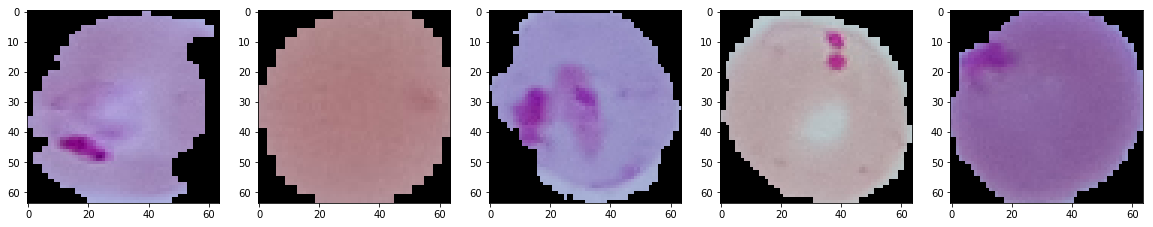

In [9]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    print(index)
    print(image_index)
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

### 感染していない画像の表示
 - 感染した画像の枚数を表示させないために、インデックスを上乗せする

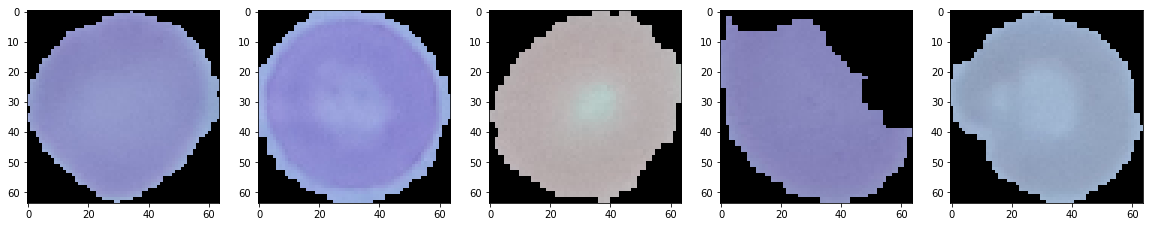

In [10]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [11]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

In [12]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [14]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 19841 samples, validate on 2205 samples
Epoch 1/50
 - 9s - loss: 0.4961 - acc: 0.7576 - val_loss: 0.7831 - val_acc: 0.7324
Epoch 2/50
 - 6s - loss: 0.2289 - acc: 0.9165 - val_loss: 0.2002 - val_acc: 0.9315
Epoch 3/50
 - 6s - loss: 0.1900 - acc: 0.9300 - val_loss: 0.2010 - val_acc: 0.9243
Epoch 4/50
 - 6s - loss: 0.1644 - acc: 0.9374 - val_loss: 0.2005 - val_acc: 0.9329
Epoch 5/50
 - 6s - loss: 0.1528 - acc: 0.9425 - val_loss: 0.2795 - val_acc: 0.8830
Epoch 6/50
 - 6s - loss: 0.1313 - acc: 0.9506 - val_loss: 0.2058 - val_acc: 0.9315
Epoch 7/50
 - 6s - loss: 0.1149 - acc: 0.9567 - val_loss: 0.1967 - val_acc: 0.9342
Epoch 8/50
 - 6s - loss: 0.0969 - acc: 0.9619 - val_loss: 0.1619 - val_acc: 0.9519
Epoch 9/50
 - 6s - loss: 0.0847 - acc: 0.9662 - val_loss: 0.1970 - val_acc: 0.9415
Epoch 10/50
 - 6s - loss: 0.0730 - acc: 0.9707 - val_loss: 0.2282 - val_acc: 0.9265
Epoch 11/50
 - 6s - loss: 0.0631 - acc: 0.9731 - val_loss: 0.1922 - val_acc: 0.9488
Epoch 12/50
 - 6s - loss: 0.0532 - a

In [15]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

5512/5512 [==============================] - 1s 128us/step
Test_Accuracy: 94.99%


<function matplotlib.pyplot.show(*args, **kw)>

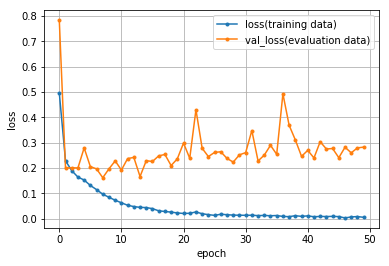

In [17]:
#ロスをエポックごとにプロットする
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = len(loss)
 
plt.plot(range(epochs),loss,marker='.',label='loss(training data)')
plt.plot(range(epochs),val_loss,marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

### データ拡張を行う

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [19]:
history = model.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False)

Epoch 1/50
345/344 [==============================] - 16s 48ms/step - loss: 0.2535 - acc: 0.9233
Epoch 2/50
345/344 [==============================] - 16s 46ms/step - loss: 0.1853 - acc: 0.9388
Epoch 3/50
345/344 [==============================] - 17s 48ms/step - loss: 0.1785 - acc: 0.9396
Epoch 4/50
345/344 [==============================] - 17s 48ms/step - loss: 0.1728 - acc: 0.9410
Epoch 5/50
345/344 [==============================] - 16s 47ms/step - loss: 0.1638 - acc: 0.9441
Epoch 6/50
345/344 [==============================] - 17s 49ms/step - loss: 0.1641 - acc: 0.9431
Epoch 7/50
345/344 [==============================] - 17s 48ms/step - loss: 0.1580 - acc: 0.9461
Epoch 8/50
345/344 [==============================] - 17s 49ms/step - loss: 0.1574 - acc: 0.9455
Epoch 9/50
345/344 [==============================] - 16s 48ms/step - loss: 0.1549 - acc: 0.9469
Epoch 10/50
345/344 [==============================] - 17s 48ms/step - loss: 0.1518 - acc: 0.9471
Epoch 11/50
345/344 [========

In [20]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(model.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))

5512/5512 [==============================] - 39s 7ms/step
Test_Accuracy(after augmentation): 95.41%


<function matplotlib.pyplot.show(*args, **kw)>

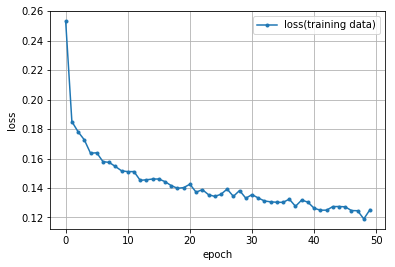

In [22]:
#ロスをエポックごとにプロットする
loss = history.history['loss']
 
epochs = len(loss)
 
plt.plot(range(epochs),loss,marker='.',label='loss(training data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show